In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob

import tensorflow as tf

from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering

from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_decision_forests as tfdf

from sklearn.datasets import make_classification

print(tf.__version__)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.8.0


### Club all the traces together into a single dataframe

In [9]:
#path = './traces_core'# use your path
#all_files = glob.glob(path + "/*.h5")

all_files = []
li = []


trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-1-0.prof.h5')
df_C_1_Tace_0 = trace.get('/events')
trace.close()
trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-1-1.prof.h5')
df_C_1_Tace_1 = trace.get('/events')
trace.close()
frames = [df_C_1_Tace_0, df_C_1_Tace_1]
df_C_1 = pd.concat(frames)
li.append(df_C_1)

trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-2-0.prof.h5')
df_C_2_Tace_0 = trace.get('/events')
trace.close()
trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-2-1.prof.h5')
df_C_2_Tace_1 = trace.get('/events')
trace.close()
frames = [df_C_2_Tace_0, df_C_2_Tace_1]
df_C_2 = pd.concat(frames)
li.append(df_C_2)

trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-4-0.prof.h5')
df_C_4_Tace_0 = trace.get('/events')
trace.close()
trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-4-1.prof.h5')
df_C_4_Tace_1 = trace.get('/events')
trace.close()
frames = [df_C_4_Tace_0, df_C_4_Tace_1]
df_C_4 = pd.concat(frames)
li.append(df_C_4)

trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-8-0.prof.h5')
df_C_8_Tace_0 = trace.get('/events')
trace.close()
trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-8-1.prof.h5')
df_C_8_Tace_1 = trace.get('/events')
trace.close()
frames = [df_C_8_Tace_0, df_C_8_Tace_1]
df_C_8 = pd.concat(frames)
li.append(df_C_8)

trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-20-0.prof.h5')
df_C_20_Tace_0 = trace.get('/events')
trace.close()
trace =  pd.HDFStore('./traces_core/dpotrf_T-200_C-20-1.prof.h5')
df_C_20_Tace_1 = trace.get('/events')
trace.close()
frames = [df_C_20_Tace_0, df_C_20_Tace_1]
df_C_20 = pd.concat(frames)
li.append(df_C_20)




In [10]:
print(len(li))

5


# Clean the data

In [11]:
for i in range(0, len(li)):
    li[i] = li[i][['begin', 'end', 'taskpool_id', 'task_class_id','chore_id', 'nb_data_items', 'total_data_size', 'priority']].copy()
    li[i]['exec_time'] = (li[i]['end'] - li[i]['begin']) * .001 #0.001 nano seconds to micro seconds
    li[i] = li[i].astype(float)

In [12]:
df_class_name = {0: 'dpotrf', 1: 'dtrsm', 2: 'dsyrk', 3: 'dgemm'}

In [14]:
for i in range(0, len(li)):
    li[i].reset_index(drop=True, inplace=True)

In [15]:
for i in range(0, len(li)):
    filter = ( (li[i]['task_class_id'] >= 0 ) & ( li[i]['task_class_id'] <= 3 ) & ( df['priority'] >= 0 ) )
    #remove all other classes other than dpotrf, dgemm, trsm and syrk
    li[i] = li[i][filter]
    #df.head()

/var/folders/xy/sdhcdzdd7m1b5v3m19jf8f940000gn/T/ipykernel_26116/2105128987.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  li[i] = li[i][filter]
/var/folders/xy/sdhcdzdd7m1b5v3m19jf8f940000gn/T/ipykernel_26116/2105128987.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  li[i] = li[i][filter]
/var/folders/xy/sdhcdzdd7m1b5v3m19jf8f940000gn/T/ipykernel_26116/2105128987.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  li[i] = li[i][filter]
/var/folders/xy/sdhcdzdd7m1b5v3m19jf8f940000gn/T/ipykernel_26116/2105128987.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  li[i] = li[i][filter]
/var/folders/xy/sdhcdzdd7m1b5v3m19jf8f940000gn/T/ipykernel_26116/2105128987.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  li[i] = li[i][filter]


## Reorder

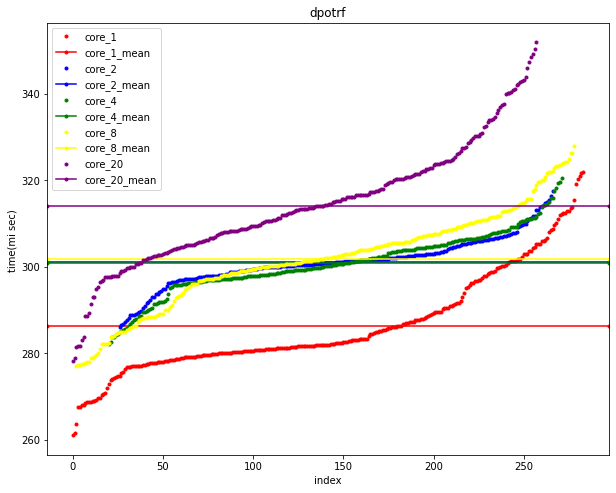

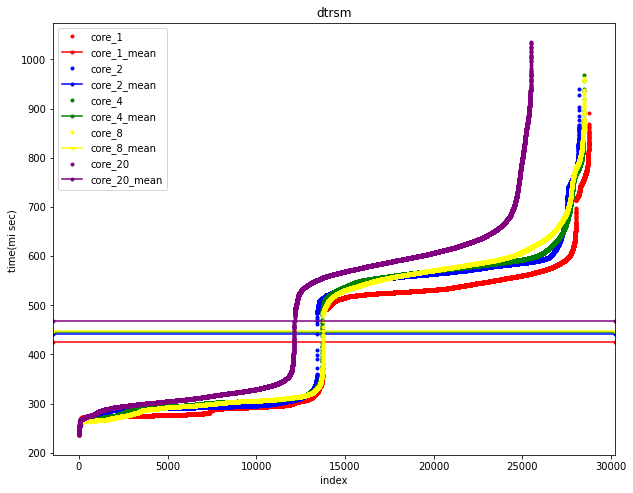

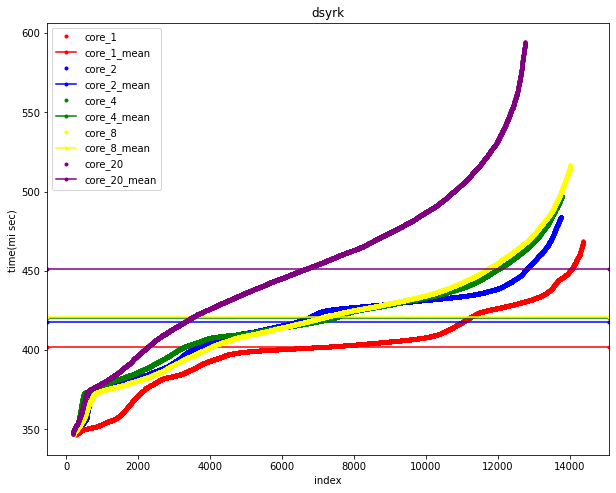

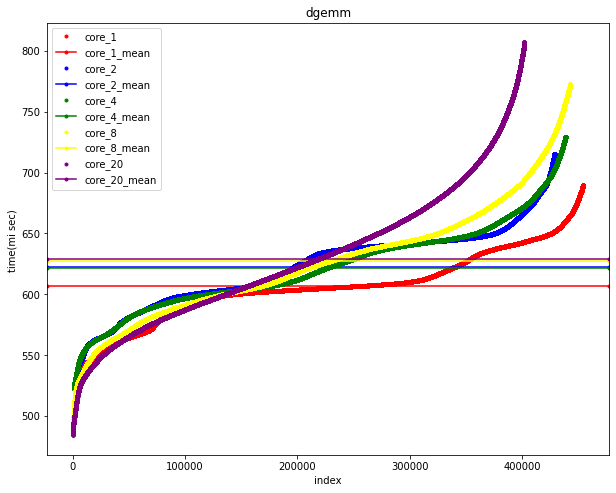

In [56]:
task_class_id = [0,1,2,3]
legend = ['core_1', 'core_1_mean', 'core_2', 'core_2_mean', 'core_4', 'core_4_mean', 'core_8', 'core_8_mean', 'core_20', 'core_20_mean']
colours = ['red', 'blue', 'green', 'yellow', 'purple', 'purple']

for i in task_class_id:
    fig = pyplot.figure()
    axes = fig.add_axes([0, 0, 1.3, 1.5])
    for j in range(0, len(li)):
    
        df_exaxmple = li[j]
    
        filter = (df_exaxmple['task_class_id'] == i )
        df_refined = df_exaxmple[filter]
        df_refined = df_refined.sort_values('exec_time', axis=0, ascending=True, 
                                        inplace=False, kind='quicksort', na_position='last')
        df_refined.insert(0, 'new_index', range(0, len(df_refined)))
    
        #print(df_refined.head())
    
    
        Q1 = df_refined['exec_time'].quantile(0.25)
        Q3 = df_refined['exec_time'].quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range.
        filter = (df_refined['exec_time'] >= Q1 - 1.5 * IQR) & (df_refined['exec_time'] <= Q3 + 1.5 *IQR)
        df_refined = df_refined.loc[filter]
        df_refined = df_refined.astype(float)
    
    
    
        ax = df_refined.plot(y='exec_time',  x='new_index',
                    ylabel='time(mi sec) ', xlabel='index',
                    marker='.', linestyle='none', ax=axes,
                            c=colours[j])
        
    
        ax.axhline(sum(df_refined['exec_time']) / len(df_refined['exec_time']), c=colours[j], marker='.')

    axes.legend(legend)
    axes.set_title(df_class_name[i])
    axes.figure.savefig('cores_' + df_class_name[i] + '.jpg', bbox_inches='tight')   
    
    
